In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

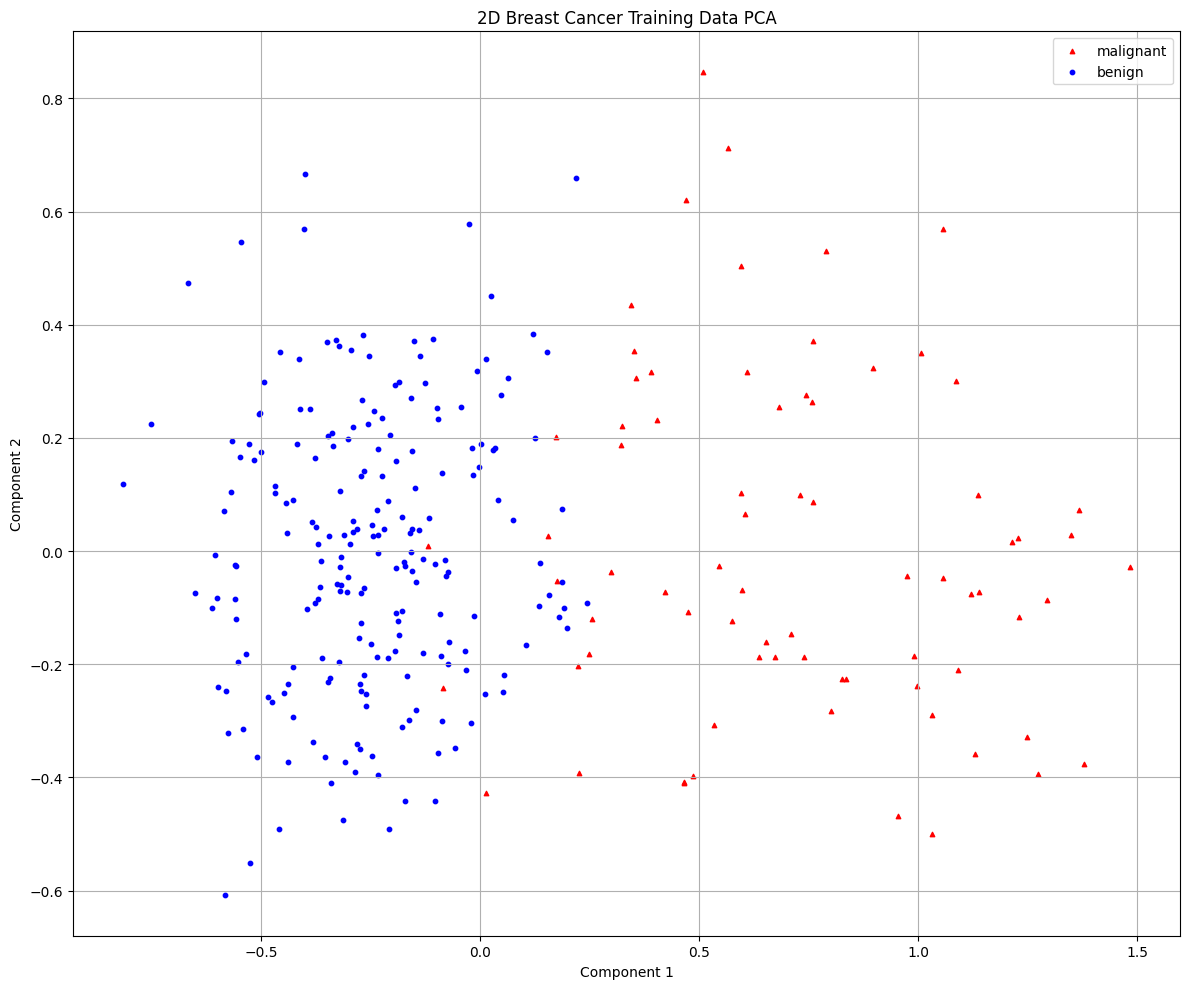

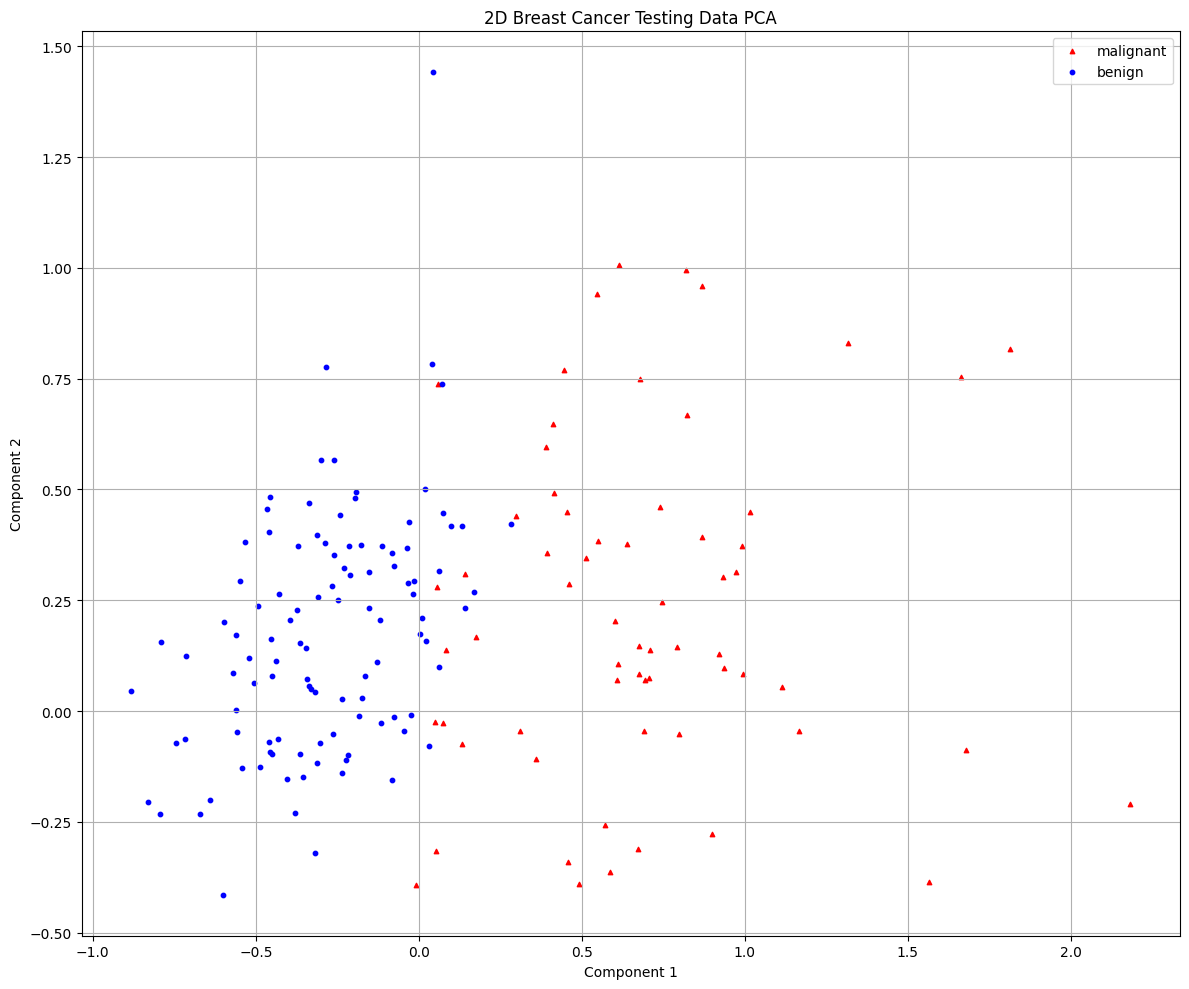

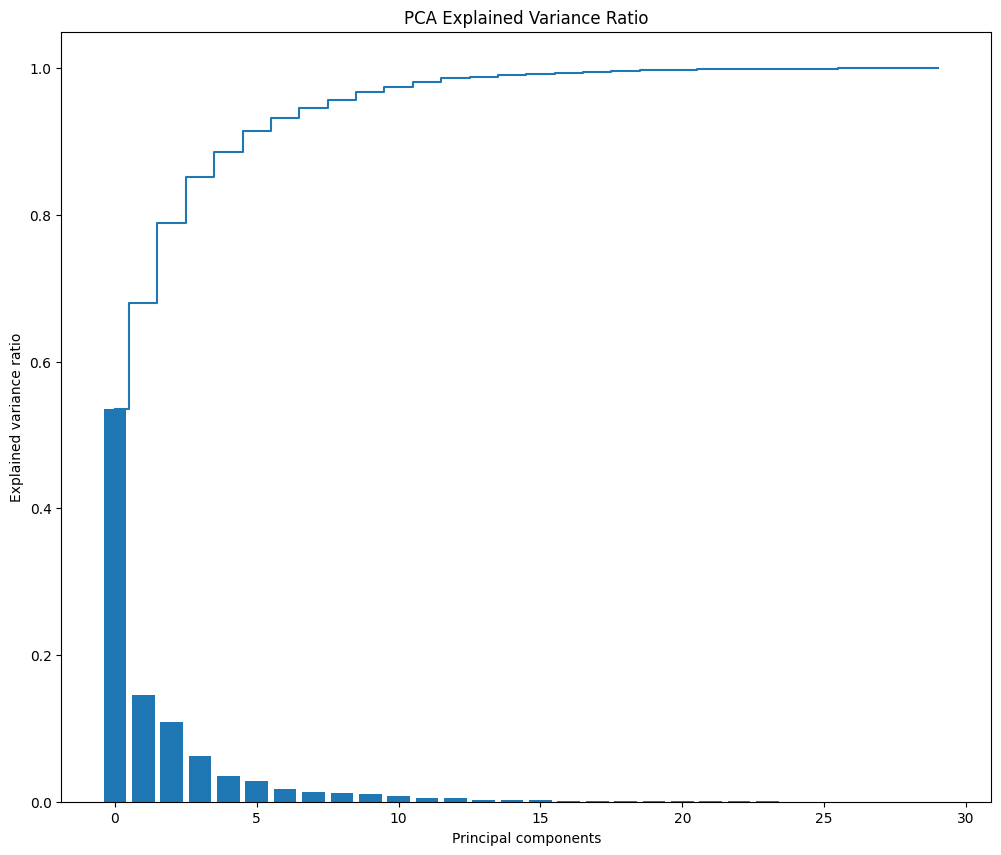

In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

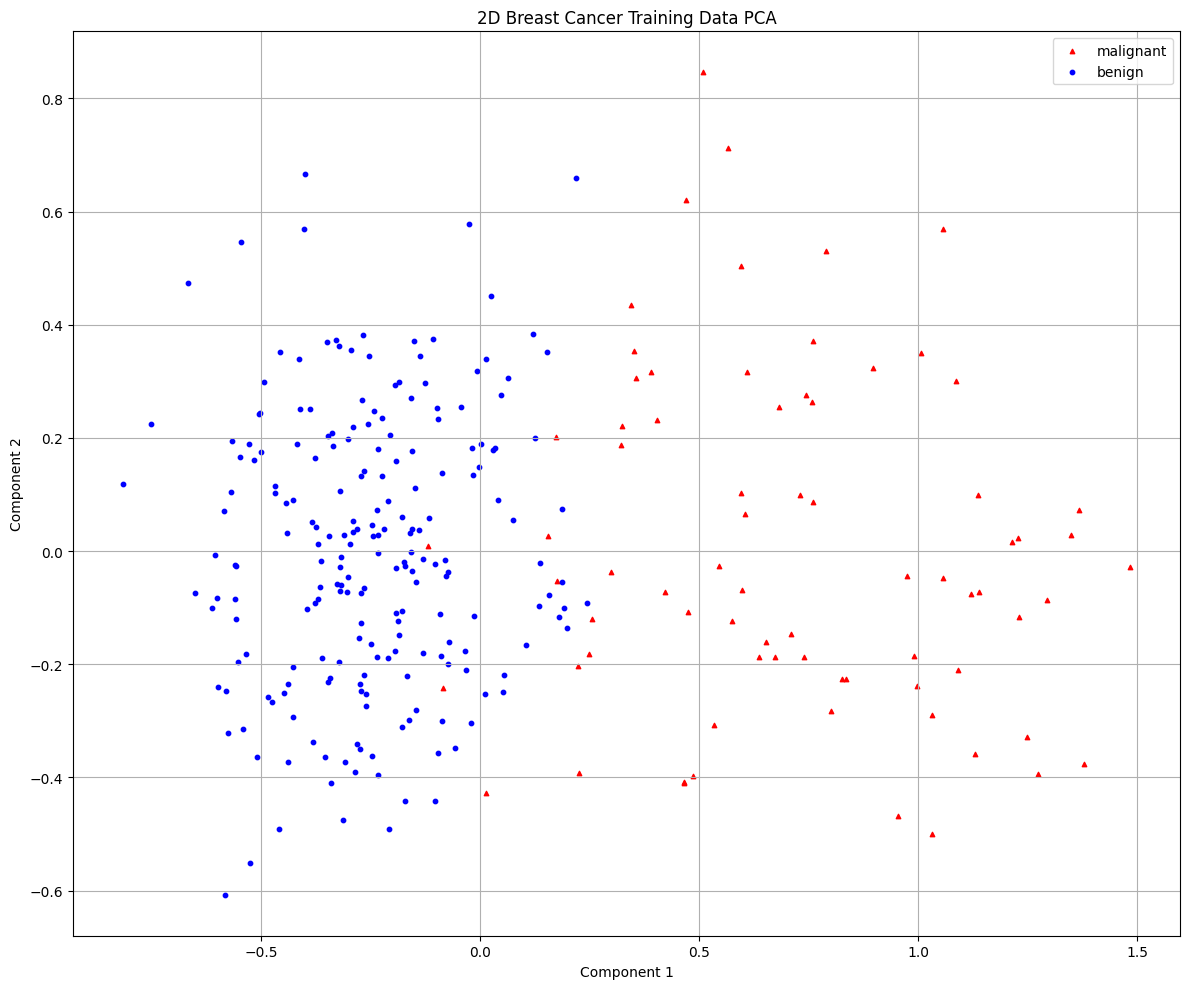

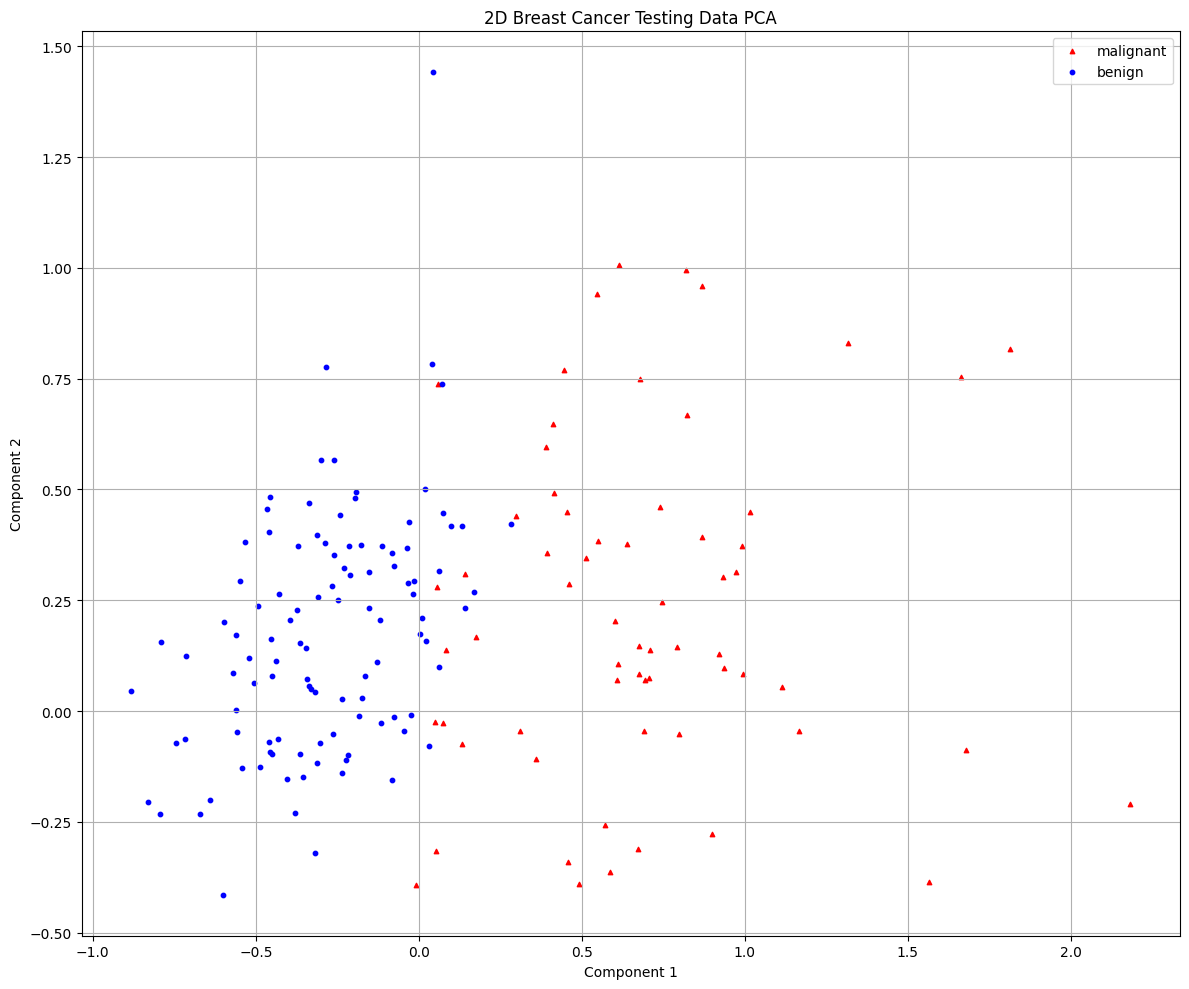

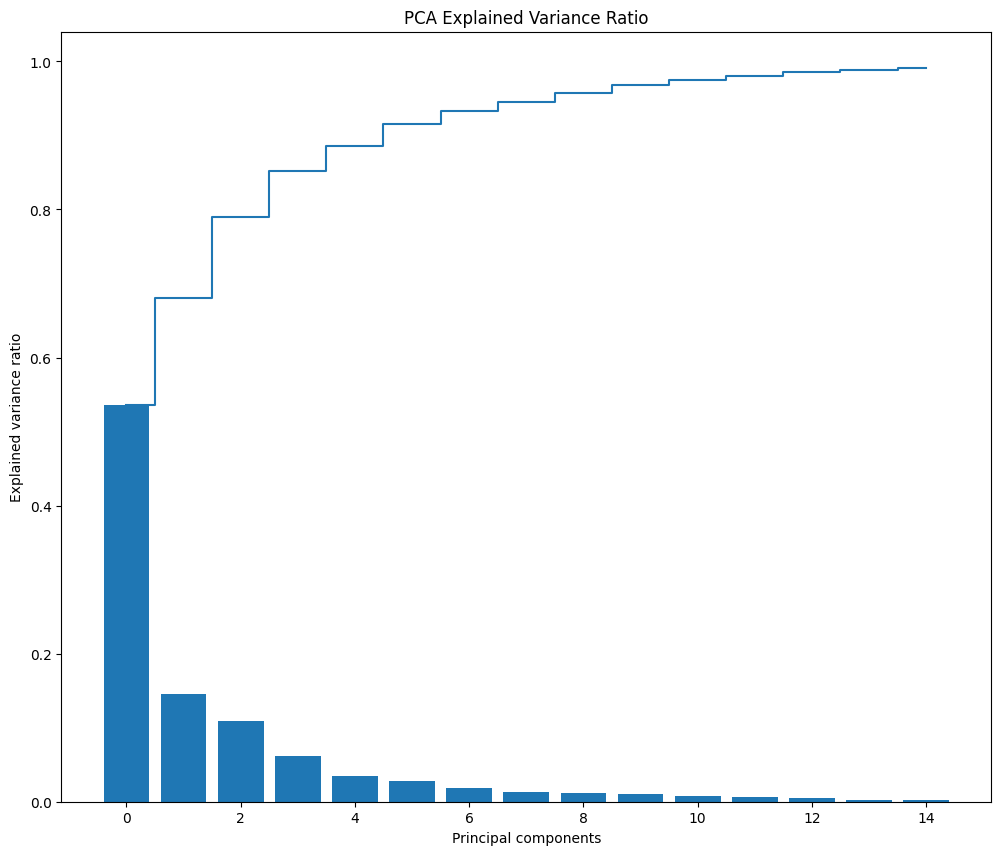

[I 2025-04-27 11:33:45,726] A new study created in memory with name: no-name-17835934-a458-4a00-8658-cbf89bbcf861
[I 2025-04-27 11:34:12,201] Trial 0 finished with value: 0.9721718088324259 and parameters: {'n_estimators': 3321, 'max_depth': 15, 'learning_rate': 0.007348743192555402, 'subsample': 0.8166423333324127, 'colsample_bytree': 0.7265706463177142, 'gamma': 0.736257765788137, 'reg_alpha': 0.16377853398915707, 'reg_lambda': 4.101451509344358e-07}. Best is trial 0 with value: 0.9721718088324259.
[I 2025-04-27 11:35:28,301] Trial 1 finished with value: 0.9756200846944949 and parameters: {'n_estimators': 7520, 'max_depth': 11, 'learning_rate': 0.0014461634323578657, 'subsample': 0.8274371210506284, 'colsample_bytree': 0.6839362088630859, 'gamma': 2.2048377001819808, 'reg_alpha': 0.002792066561538846, 'reg_lambda': 3.6927351317399793e-06}. Best is trial 1 with value: 0.9756200846944949.
[I 2025-04-27 11:36:25,743] Trial 2 finished with value: 0.9754385964912281 and parameters: {'n_es

Best trial:
Accuracy: 0.9826376285541439
Best hyperparameters:  {'n_estimators': 8177, 'max_depth': 10, 'learning_rate': 0.0018363002626609673, 'subsample': 0.6013391179334038, 'colsample_bytree': 0.834215862355633, 'gamma': 1.750280786495241, 'reg_alpha': 0.11465662268871644, 'reg_lambda': 0.0003636321720393378}


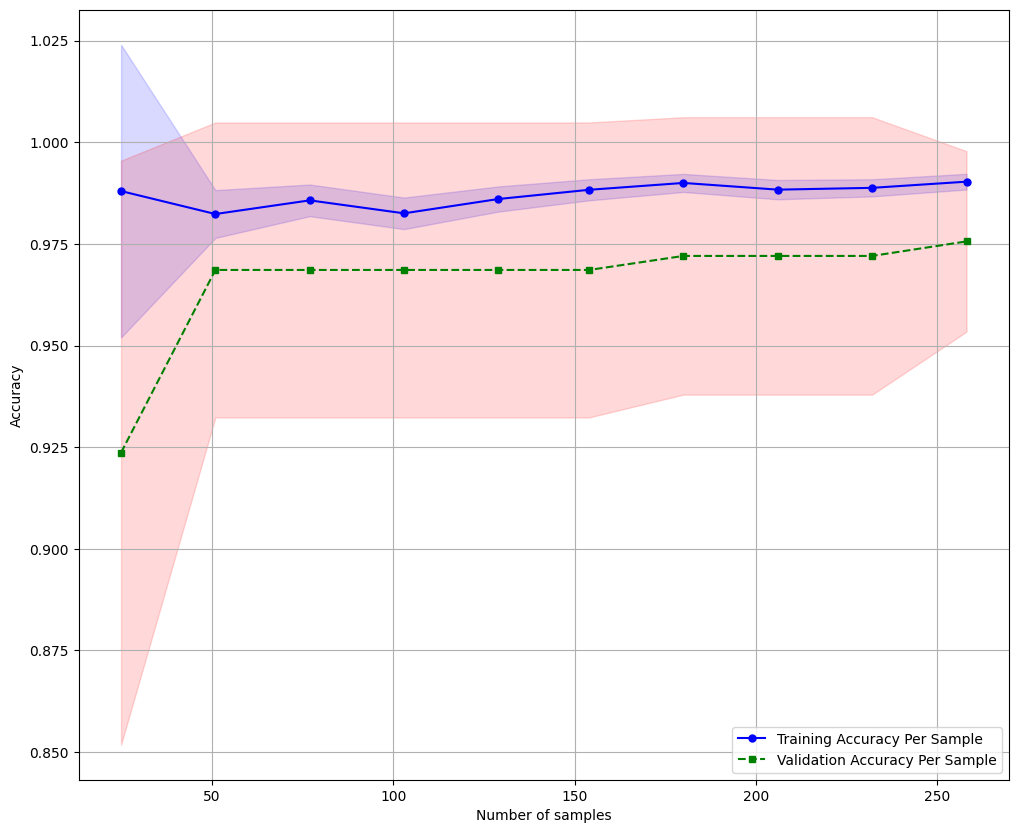

Confusion Matrix
[[ 55   9]
 [  3 104]]
Accuracy: 0.9298, Precision: 0.9204, Recall: 0.9720, F1: 0.9455, AUC: 0.9812


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)